In [45]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)
import matplotlib.pyplot as plt

In [46]:
from tqdm import tqdm

In [47]:
from plot_utils import *

In [48]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [49]:
from diffusion_utils import *

In [50]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# Load

In [51]:
params_list=[
({'nu':0,'de':1,},
{
# 'p_ctrl':[.47,.49,.51,.53],
'p_ctrl':[.5],
# 'p_ctrl':[0.4,0.45,0.47,0.49,0.5,0.51,0.53,0.55,0.6],
'p_proj':np.linspace(0.0,0.0,1),
# 'sC':np.arange(0,500),
'sC':np.arange(0,500),
'sm':np.arange(500),
# 'L':[10,20,30,40]
'L':[20,]
}
),
]

In [ ]:
# For each individual
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_T.json',
        # fn_dir_template='./MPS_0-1_C_m_x00',
        fn_dir_template='../CT_MPS/MPS_0-1_C_m_x01_T',
        # fn_dir_template='./MPS_0-1_C_m_x0',
        input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {sC} {sm} ',
        load_data=load_json,
        filename='params_CT_MPS_0_C_m_T_L10.txt',
        filelist=None,
        load=False,
        data_dict=None,
        # data_dict_file='xj({nu},{de})_C_m.pickle', 
        # data_dict_file='xj({nu},{de})_C_m.json', 
    )

In [108]:
# for a long string parameter
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_T.json',
        # fn_dir_template='./MPS_0-1_C_m_x00',
        fn_dir_template='../CT_MPS/MPS_0-1_C_m_x01_T',
        # fn_dir_template='./MPS_0-1_C_m_x0',
        input_params_template='{p_ctrl:.3f},{p_proj:.3f},{L},{sC},{sm} ',
        load_data=load_json,
        filename='params_CT_MPS_0_C_m_T_series_L10.txt',
        filelist=None,
        load=False,
        data_dict=None,
        # data_dict_file='xj({nu},{de})_C_m.pickle', 
        # data_dict_file='xj({nu},{de})_C_m.json', 
    )



generate_params: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000000/3000000 [01:50<00:00, 27152.44it/s]


In [109]:
with open('params_CT_MPS_0_C_m_T_series_L10.txt','r') as f:
    # lines=f.readlines()
    linewidth=1000
    count=0
    total_string = []
    string = ''
    for line in f:
        string = string + ',' + line.strip()
        count+=1
        if count>=linewidth:
            count=0
            total_string.append(string[1:])
            string= ''

with open('params_CT_MPS_0_C_m_T_series_L10.txt','w') as f:
    f.write('\n'.join(total_string))

In [ ]:
# Load for trajectories of operator
for fixed_params,vary_params in params_list:
    data_MPS_0_DW_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_O_op.json',
        fn_dir_template='./MPS_0-1_C_m_x01',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        zip_fn='/home/jake/Data/MPS_0-1_C_m_x01.zip'  
    )
df_MPS_0_DW=convert_pd(data_MPS_0_DW_dict,names=['Metrics','sm','sC','p_ctrl','L','p_proj',])

In [ ]:
MPS_0-1_C_m_T_L20.zip

In [60]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_DW_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_DW_T.json',
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_T.json',
        fn_dir_template='/MPS_0-1_C_m_x01_T',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        # zip_fn='/home/jake/Data/MPS_0-1_C_m_x01_T_L10.zip'  
        # zip_fn='/home/jake/Data/MPS_0-1_C_m_x01_T.zip' 
        # zip_fn='/home/jake/Data/MPS_0-1_C_m_T_L20.zip'   
        zip_fn='/home/jake/Data/MPS_0-1_C_m_x01_T_L20.zip'   
    )
df_MPS_0_T_DW=convert_pd(data_MPS_0_T_DW_dict,names=['Metrics','sm','sC','p_ctrl','L','p_proj',])

generate_params: 100%|██████████| 250000/250000 [02:40<00:00, 1553.69it/s]


In [61]:
df_MPS_0_T_DW.index.get_level_values('Metrics').unique()

Index(['DW1', 'DW2'], dtype='object', name='Metrics')

In [ ]:
data=df_MPS_0_T_DW.xs(20,level='L').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC')

single=data.xs(0,level='sm').loc['DW1']['observations']
# single=data.xs(0,level='sm').loc['DW2']['observations']-data.xs(0,level='sm').loc['DW1']['observations']**2

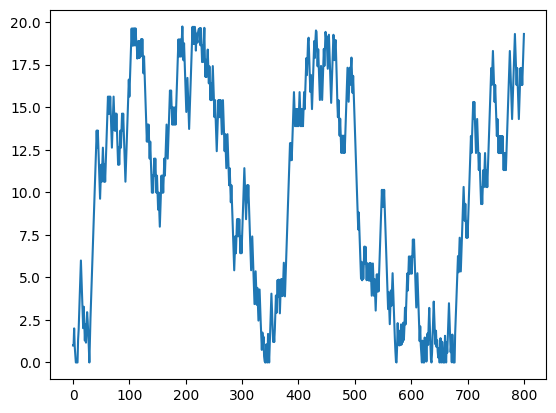

In [ ]:
plt.plot(single)

# artistic plot

In [43]:
L=20
p=0.5
sC=0
data=df_MPS_0_T_DW.xs(L,level='L').xs(p,level='p_ctrl').xs(0.0,level='p_proj').xs(sC,level='sC')
single=[data.xs(sm,level='sm').loc['DW1']['observations'] for sm in range((params_list[0][1]['sm']).shape[0])]


(0.0, 20.949562758350556)

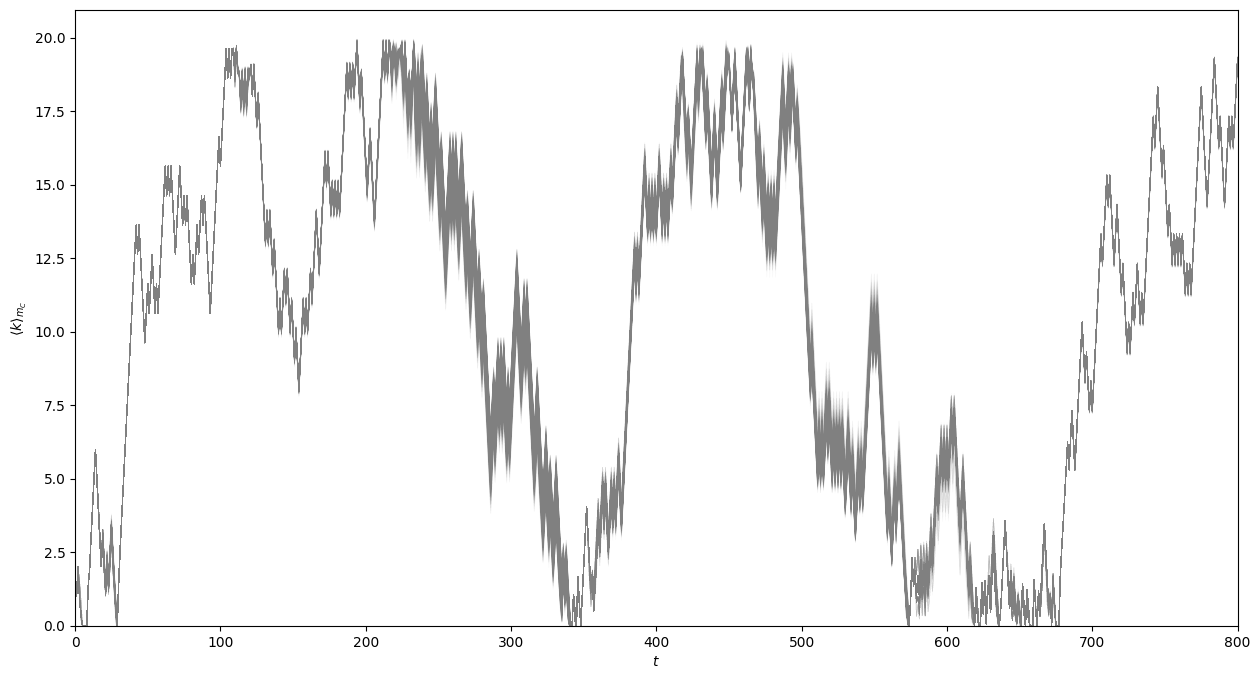

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range((params_list[0][1]['sm']).shape[0]):
    ax.plot(single[i],color='gray',alpha=0.05,linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(0,2*L**2)
ax.set_ylim(0,None)

In [48]:
op_hist=df_MPS_0_DW.xs(L,level='L').xs(p,level='p_ctrl').xs(0.0,level='p_proj').xs(sC,level='sC').xs('op_history',level='Metrics').iloc[0]['observations'][:,0]
color_list=[0 if x['Type'] == 'Bernoulli' else 1 for x in op_hist]

In [23]:
single[3]

3.268521302184737

In [ ]:
fig,ax=plt.subplots(figsize=(6,15))
for i in range((params_list[0][1]['sm']).shape[0]):
    ax.plot(single[i],np.arange(single[i].shape[0]),color='gray',alpha=0.05,linewidth=0.5)
ax.set_ylabel('$t$')
ax.set_xlabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(L,0)
ax.set_ylim(0,None)

In [86]:
# color_dict={}
# single_circuit={}
single_circuit[(p,sC)]=single
color_dict[(p,sC)]=color_list

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C} ]^2 $')

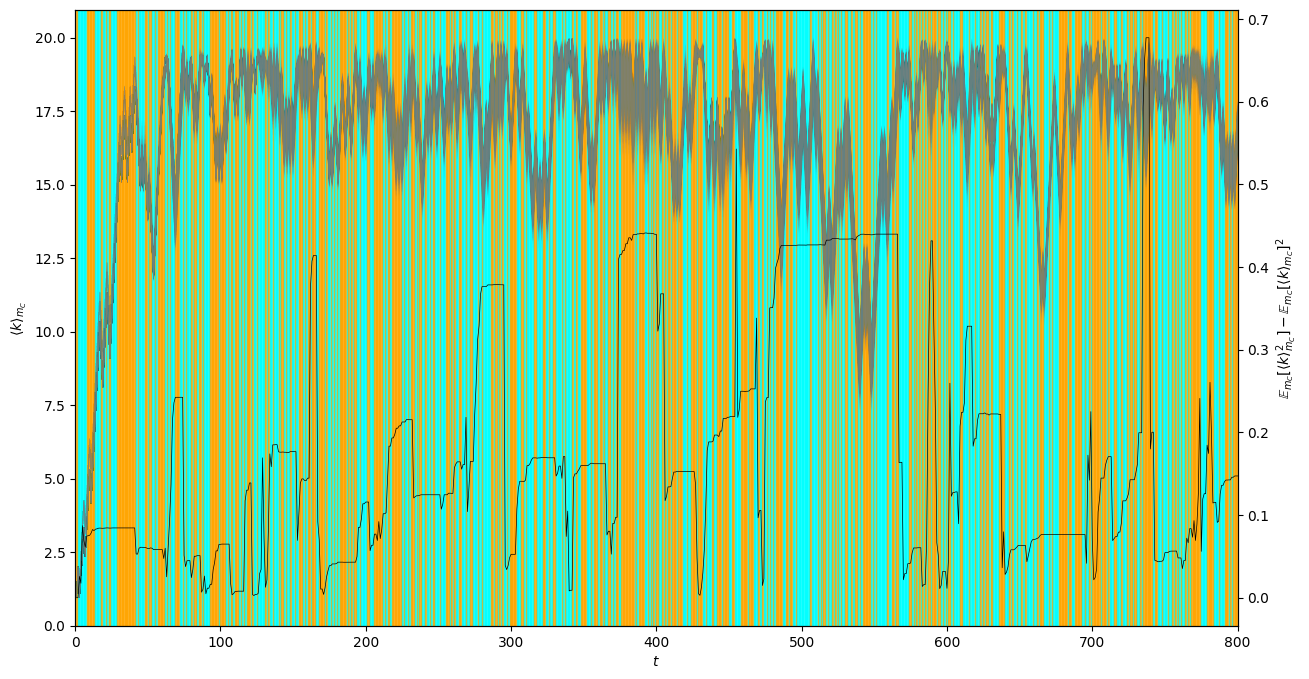

In [85]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range((params_list[0][1]['sm']).shape[0]):
# for i in range(100):
    ax.plot(single[i],color='gray',alpha=0.05,linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(0,2*L**2)
ax.set_ylim(0,None)

for idx, color in enumerate(color_list):
    ax.axvspan(idx,idx+1,color='orange' if color==0 else 'cyan',alpha=0.75)

ax2=ax.twinx()
ax2.plot(np.array(single).var(axis=0),color='black',linewidth=.5)
ax2.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C} ]^2 $')

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C} ]^2 $')

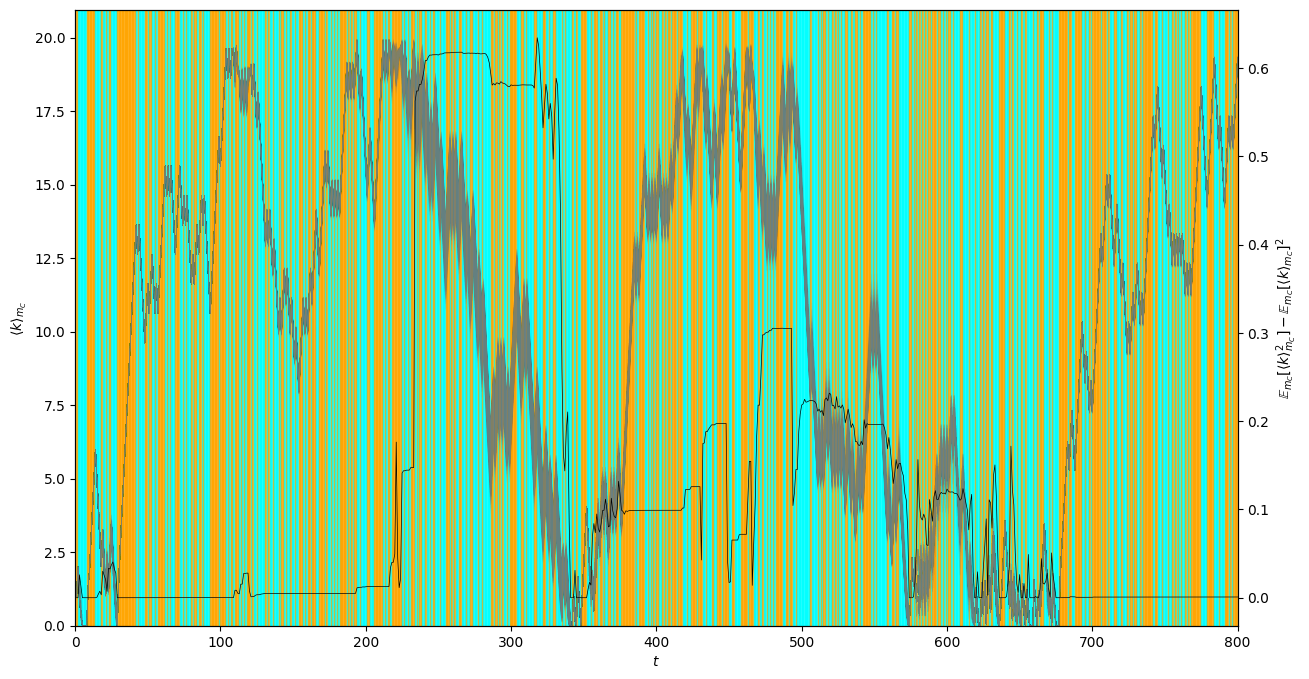

In [82]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range((params_list[0][1]['sm']).shape[0]):
# for i in range(100):
    ax.plot(single[i],color='gray',alpha=0.05,linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(0,2*L**2)
ax.set_ylim(0,None)

for idx, color in enumerate(color_list):
    ax.axvspan(idx,idx+1,color='orange' if color==0 else 'cyan',alpha=0.75)

ax2=ax.twinx()
ax2.plot(np.array(single).var(axis=0),color='black',linewidth=.5)
ax2.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C} ]^2 $')

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C} ]^2 $')

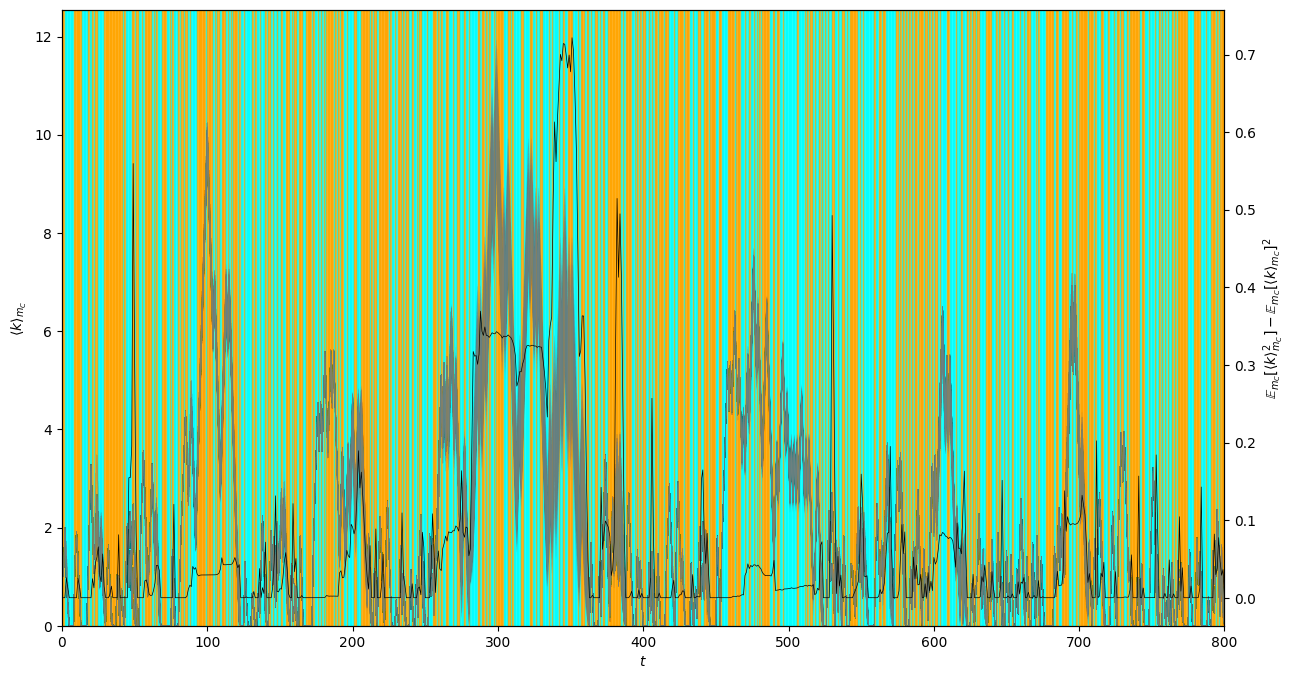

In [80]:
fig,ax=plt.subplots(figsize=(15,8))
for i in range((params_list[0][1]['sm']).shape[0]):
# for i in range(100):
    ax.plot(single[i],color='gray',alpha=0.05,linewidth=0.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\langle{k}\rangle_{m_C}$')
ax.set_xlim(0,2*L**2)
ax.set_ylim(0,None)

for idx, color in enumerate(color_list):
    ax.axvspan(idx,idx+1,color='orange' if color==0 else 'cyan',alpha=0.75)

ax2=ax.twinx()
ax2.plot(np.array(single).var(axis=0),color='black',linewidth=.5)
ax2.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C} ]^2 $')

In [87]:
with open('single_circuit_L20.pickle','wb') as f:
    pickle.dump([single_circuit,color_dict],f)

In [26]:
with open('traj_fluct.pickle','wb') as f:
    pickle.dump(single,f)

## Circuit fluctuation

In [62]:
df_MPS_0_T_DW.xs(L,level='L').xs(p,level='p_ctrl').xs(0.0,level='p_proj')

,,,observations
Metrics,sm,sC,
DW1,0,0,"[1.0, 0.9994184529754019, 2.0028039391006445, ..."
DW2,0,0,"[0.9999999999999991, 1.8157242741817998, 4.842..."
DW1,1,0,"[1.0, 0.9994184529754019, 2.0028039391006445, ..."
DW2,1,0,"[0.9999999999999991, 1.8157242741817998, 4.842..."
DW1,2,0,"[1.0, 0.9994184529754019, 2.0028039391006445, ..."
...,...,...,...
DW2,497,499,"[0.9999999999999991, 2.586527656631733, 6.8101..."
DW1,498,499,"[1.0, 1.3193488660548538, 2.4815660396002843, ..."
DW2,498,499,"[0.9999999999999991, 2.586527656631733, 6.8101..."


In [63]:
L=20
p=0.5
# sC=0
circ_fluc=[]
for sC in tqdm(range(500)):
# for sC in tqdm(range(5)):
    data=df_MPS_0_T_DW.xs(L,level='L').xs(p,level='p_ctrl').xs(0.0,level='p_proj').xs(sC,level='sC')
    single=np.mean([data.xs(sm,level='sm').loc['DW1']['observations'] for sm in range((params_list[0][1]['sm']).shape[0])],axis=0)
    circ_fluc.append(single)


100%|██████████| 500/500 [04:43<00:00,  1.76it/s]


(0.0, 40.0)

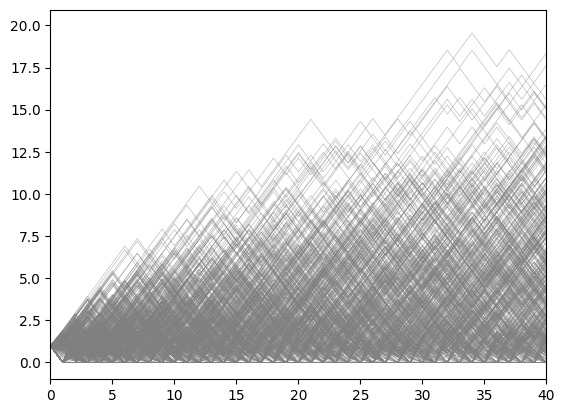

In [64]:
for i in range(500):
# for i in range(5):
    plt.plot(circ_fluc[i],color='gray',alpha=0.5,linewidth=0.5)
plt.xlim(0,40)

In [67]:
with open('circuit_fluct.pickle','wb') as f:
    pickle.dump(circ_fluc,f)

(0.0, 40.0)

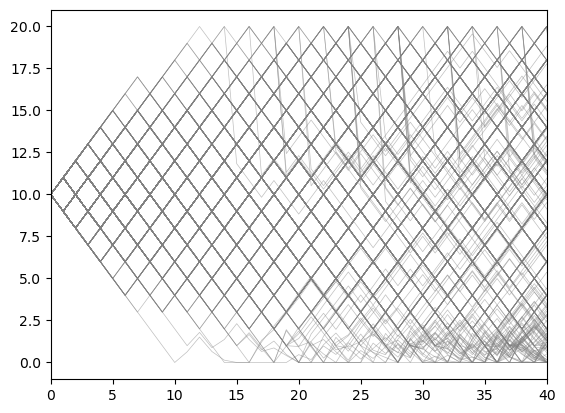

In [ ]:
for i in range(500):
    plt.plot(circ_fluc[i],color='gray',alpha=0.5,linewidth=0.5)
plt.xlim(0,40)

In [27]:
np.mean(single,axis=0).shape

(201,)

In [25]:
np.vstack(single).mean(axis=0).shape

(201,)

In [ ]:
# State fluctutation

In [30]:
L=20
p=0.5
sC=0
sm=0
data=df_MPS_0_T_DW.xs(L,level='L').xs(p,level='p_ctrl').xs(0.0,level='p_proj').xs(sC,level='sC').xs(sm,level='sm')
# single=[data.xs(sm,level='sm').loc['DW1']['observations'] for sm in range((params_list[0][1]['sm']).shape[0])]


# QuVar of FDW

In [27]:
def qvar_dw(df, L,p_ctrl,sC):
    data=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0,level='p_proj').xs(sC,level='sC')
    single=np.array([data.xs(sm,level='sm').loc['DW2']['observations']-data.xs(sm,level='sm').loc['DW1']['observations']**2 for sm in range((params_list[0][1]['sm']).shape[0])])
    return single.mean(axis=0)

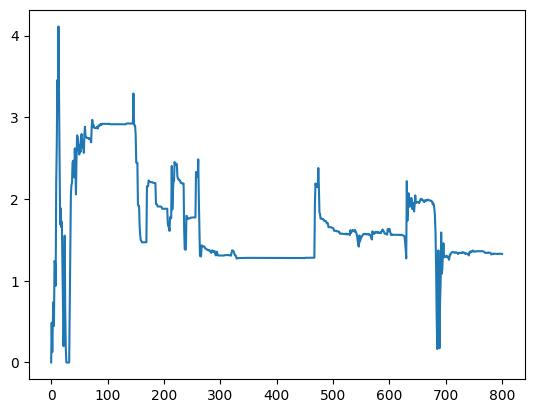

In [29]:
plt.plot(qvar_dw(df_MPS_0_T_DW,L=20,p_ctrl=0.5,sC=3))

In [ ]:
qvar_dw_dict={}
qvar_dw_sem_dict={}
for p in tqdm(params_list[0][1]['p_ctrl']):
    for L in params_list[0][1]['L']:
        print(p,L)
        sC_qvar_dw=[qvar_dw(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC) for sC in np.arange((params_list[0][1]['sC']).shape[0])]
        qvar_dw_dict[(p,L)]=np.mean(sC_qvar_dw,axis=0)
        qvar_dw_sem_dict[(p,L)]=np.std(sC_qvar_dw,axis=0)/np.sqrt((params_list[0][1]['sC']).shape[0]*(params_list[0][1]['sm']).shape[0])
        

In [242]:
qvar_dw_dict[(p,L)]-qvar_dw_sem_dict[(p,L)]
qvar_dw_dict[(p,L)]+qvar_dw_sem_dict[(p,L)]

array([8.57005046e-16, 2.28776519e-01, 3.25410041e-01, ...,
       7.13355420e-01, 6.90708619e-01, 7.40923539e-01])

Text(0, 0.5, '$\\mathbb{E}_C\\mathbb{E}_{m_C}[ \\langle {O^2}\\rangle_{m_C} -\\langle{O}\\rangle_{m_C}^2 ] $')

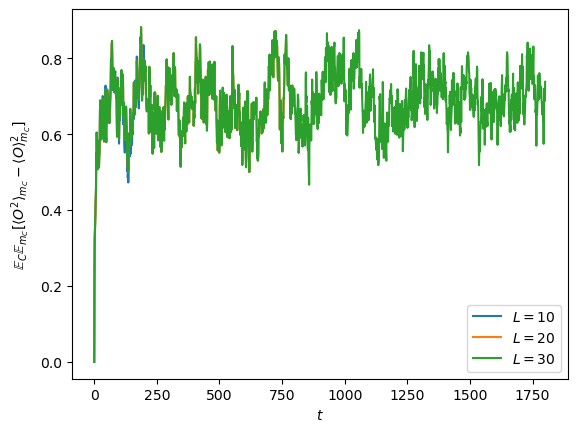

In [245]:
fig, ax = plt.subplots()
p=0.6
for L in params_list[0][1]['L']:
    x=np.arange(qvar_dw_dict[(p,L)].shape[0])
    ax.plot(qvar_dw_dict[(p,L)],label=rf'$L={L}$',alpha=1)
    ax.fill_between(x, qvar_dw_dict[(p,L)]-qvar_dw_sem_dict[(p,L)], qvar_dw_dict[(p,L)]+qvar_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C\mathbb{E}_{m_C}[ \langle {O^2}\rangle_{m_C} -\langle{O}\rangle_{m_C}^2 ] $')

Text(0, 0.5, '$\\mathbb{E}_C\\mathbb{E}_{m_C}[ \\langle {O^2}\\rangle_{m_C} -\\langle{O}\\rangle_{m_C}^2 ] $')

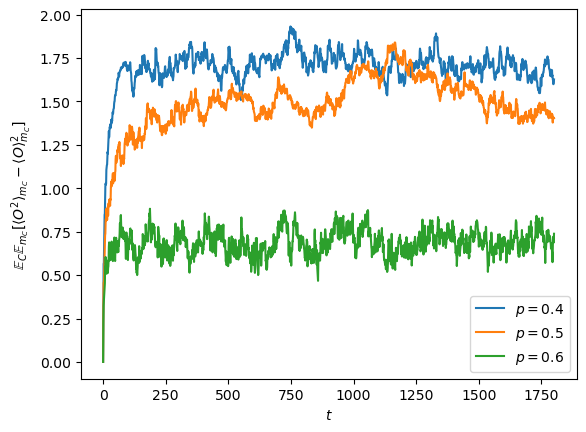

In [180]:
fig, ax= plt.subplots()
L=30
for p in params_list[0][1]['p_ctrl']:
    x=np.arange(qvar_dw_dict[(p,L)].shape[0])
    ax.plot(qvar_dw_dict[(p,L)],label=rf'$p={p}$',alpha=1)
    ax.fill_between(x, qvar_dw_dict[(p,L)]-qvar_dw_sem_dict[(p,L)], qvar_dw_dict[(p,L)]+qvar_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C\mathbb{E}_{m_C}[ \langle {O^2}\rangle_{m_C} -\langle{O}\rangle_{m_C}^2 ] $')

# Trajectory fluctuations 

In [14]:
def trajvar(df,L,p_ctrl,sC):
    data=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj').xs(sC,level='sC')

    single=[data.xs(sm,level='sm').loc['DW1']['observations'] for sm in range((params_list[0][1]['sm']).shape[0])]

    return np.array(single).var(axis=0)

In [78]:
sC_traj_var_dw=[trajvar(df_MPS_0_T_DW,L=10,p_ctrl=0.4,sC=sC) for sC in range((params_list[0][1]['sC']).shape[0])]

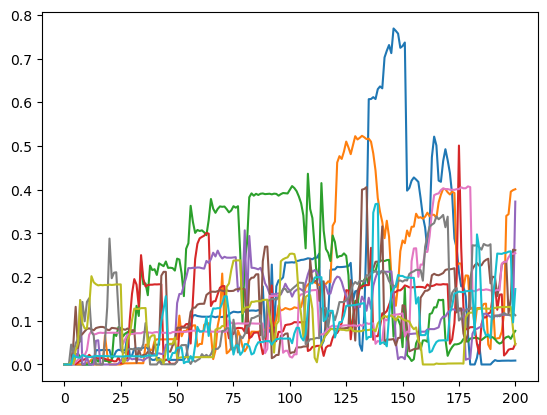

In [86]:
fig,ax=plt.subplots()
# for sC in range((params_list[0][1]['sC']).shape[0]):
for sC in range(10,20):
    ax.plot(sC_traj_var_dw[sC],label=f'sC={sC}')

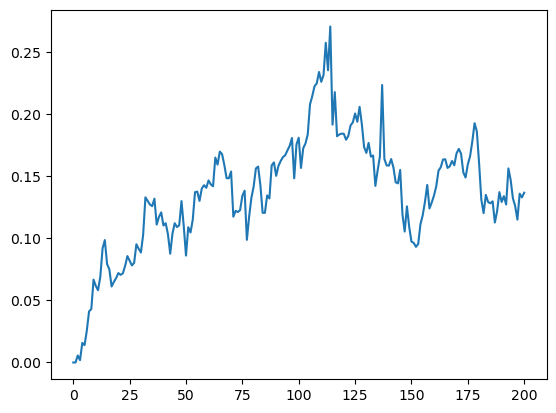

In [83]:
plt.plot(np.mean(sC_traj_var_dw[110:120],axis=0))

In [18]:
# # L=20
# # p=0.5
# trajvar_sC={}
# for L in [10,20,30]:
#     for p in [.4,.5,.6]:
#         print(p,L)
#         trajvar_sC[p,L]=np.array([trajvar(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC) for sC in range((params_list[0][1]['sC']).shape[0])])

10 0.4
10 0.5
10 0.6
20 0.4
20 0.5
20 0.6
30 0.4
30 0.5
30 0.6


In [100]:
traj_var_dw_dict={}
traj_var_dw_sem_dict={}
sC_traj_var_dw={}
for p in tqdm(params_list[0][1]['p_ctrl']):
    for L in params_list[0][1]['L']:
        print(p,L)
        # sC_traj_var_dw=[trajvar(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC) for sC in range((params_list[0][1]['sC']).shape[0])]
        sC_traj_var_dw[(p,L)]=[]
        for sC in range((params_list[0][1]['sC']).shape[0]):
            try:
                sC_traj_var_dw[(p,L)].append(trajvar(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC))
            except:
                pass
        sC_traj_var_dw[(p,L)]=np.array(sC_traj_var_dw[(p,L)])
        traj_var_dw_dict[(p,L)], traj_var_dw_sem_dict[(p,L)]=np.mean(sC_traj_var_dw[(p,L)],axis=0), np.std(sC_traj_var_dw[(p,L)],axis=0)/np.sqrt((params_list[0][1]['sC']).shape[0])

  0%|                                                                                                                                                                                                                                          | 0/5 [00:00<?, ?it/s]

0.4 10
0.4 20
0.4 30


 20%|█████████████████████████████████████████████                                                                                                                                                                                    | 1/5 [05:58<23:55, 359.00s/it]

0.45 10
0.45 20
0.45 30


 40%|██████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                       | 2/5 [11:45<17:34, 351.60s/it]

0.5 10
0.5 20
0.5 30


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 3/5 [17:52<11:57, 358.77s/it]

0.55 10


/home/haining.pan/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/haining.pan/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/haining.pan/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/haining.pan/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/haining.pan/.pyenv/versions/anaconda3-2023.03/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value en

0.55 20
0.55 30


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 4/5 [20:46<04:45, 285.61s/it]

0.6 10
0.6 20
0.6 30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [26:49<00:00, 321.95s/it]


In [19]:
np.array(sC_traj_var_dw[0.4,10]).shape

(500, 201)

In [24]:
sC_traj_var_dw_bak=sC_traj_var_dw

In [25]:
sC_traj_var_dw={key:np.array(val) for key,val in sC_traj_var_dw.items()}

In [27]:
(sC_traj_var_dw[0.4,10]).shape

(500, 201)

In [6]:
with open('C_m_T.pickle','rb') as f:
    [sC_traj_var_dw,traj_var_dw_dict,traj_var_dw_sem_dict]=pickle.load(f)

In [7]:
with open('C_m_T_L40.pickle','rb') as f:
    [sC_traj_var_dw_L40,traj_var_dw_dict_L40,traj_var_dw_sem_dict_L40]=pickle.load(f)

In [9]:
sC_traj_var_dw.update(sC_traj_var_dw_L40)
traj_var_dw_dict.update(traj_var_dw_dict_L40)
traj_var_dw_sem_dict.update(traj_var_dw_sem_dict_L40)

Text(0, 0.5, '$p(\\sigma^2)$')

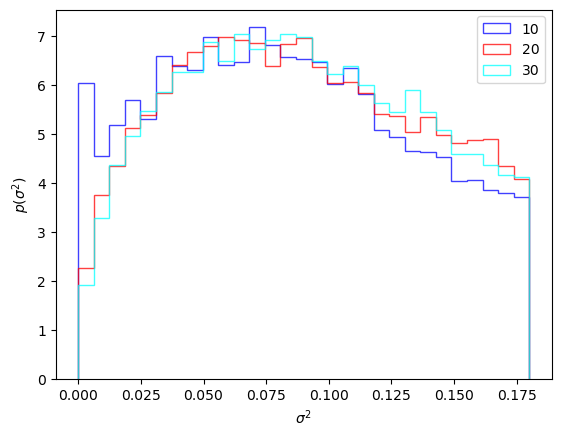

In [66]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.4,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=1,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.4,L][:,1*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.4,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

Text(0, 0.5, '$p(\\sigma^2)$')

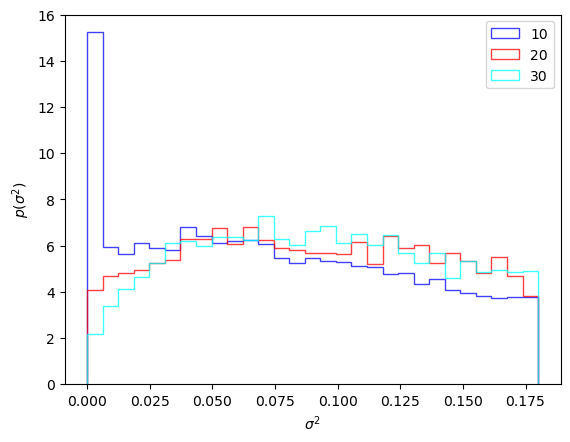

In [17]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.45,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=1,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.45,L][:,1*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.45,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

Text(0, 0.5, '$p(\\sigma^2)$')

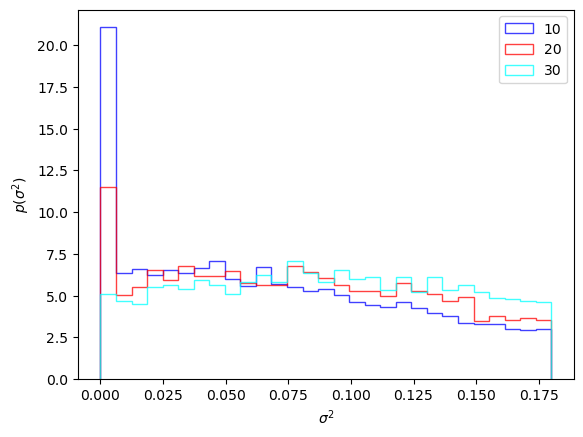

In [18]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.47,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=1,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.47,L][:,1*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.47,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

Text(0, 0.5, '$p(\\sigma^2)$')

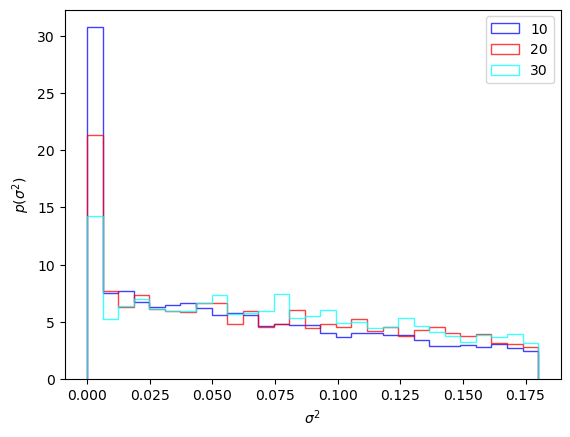

In [19]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.49,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=1,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.49,L][:,1*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.49,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

Text(0, 0.5, '$p(\\sigma^2)$')

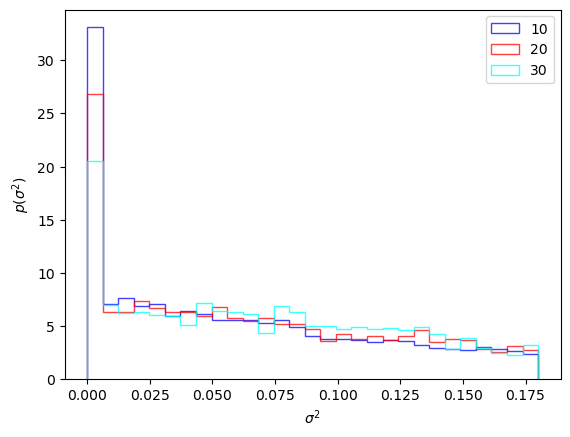

In [42]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.5,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.5,L][:,2*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # ,histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.6,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

Text(0, 0.5, '$p(\\sigma^2)$')

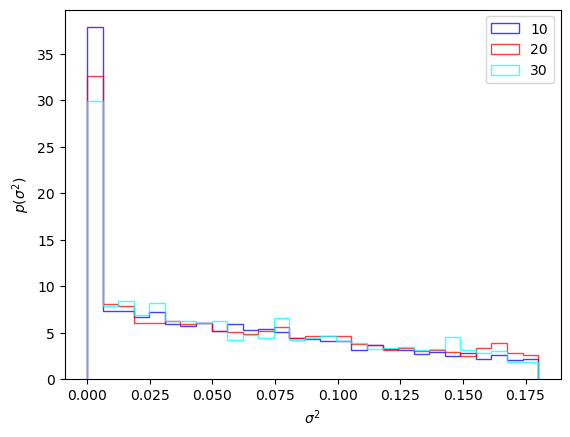

In [20]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.51,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.51,L][:,2*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # ,histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.6,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

In [ ]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.53,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.53,L][:,2*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # ,histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.6,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

Text(0, 0.5, '$p(\\sigma^2)$')

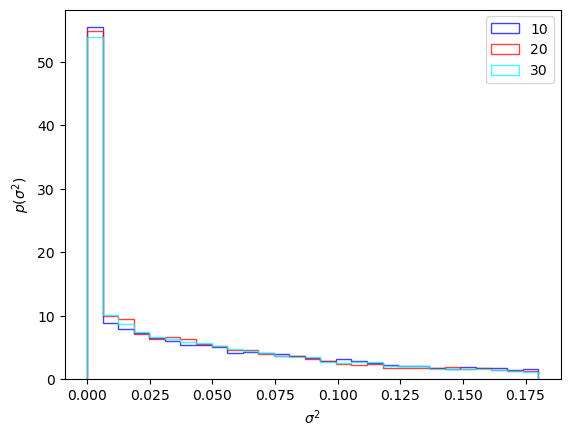

In [12]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # 2*L**2-30:2*L**2
    # ax.hist(sC_traj_var_dw[0.55,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=1,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.55,L][:,1*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)
    # histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.55,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


plt.legend()

ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

Text(0, 0.5, '$p(\\sigma^2)$')

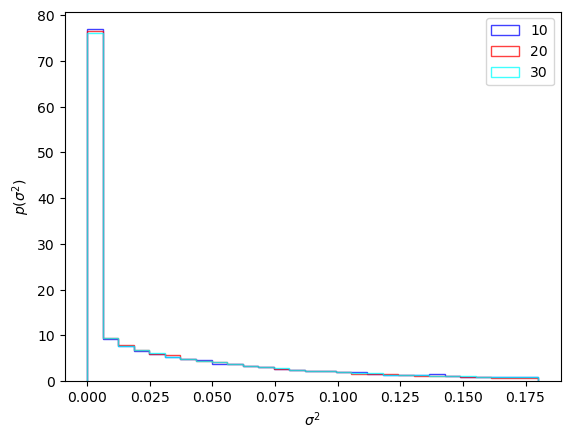

In [44]:
color_list=(x for x in ['blue','red','cyan'])
fig,ax=plt.subplots()
for L in [10,20,30]:
# for L in [10]:
    color=next(color_list)
    # histogram
    # ax.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].mean(axis=1),bins=np.linspace(0,0.18,20),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step')
    ax.hist(sC_traj_var_dw[0.6,L][:,2*L**2//2:2*L**2].flatten(),bins=np.linspace(0,0.18,30),density=True,alpha=0.75,label=f'{L}',color=color,histtype='step',log=False)

    # ,histtype=u'step'
    # plt.hist(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten(),bins=np.linspace(0,0.18,200),density=True,alpha=0.75,label=f'{L}',log=True)

    # kernel density estimate
    # dd=(sC_traj_var_dw[0.6,L][:,2*L**2-30:2*L**2].mean(axis=1))
    # kde = gaussian_kde(dd,bw_method=0.1)
    # x_range = np.linspace(min(dd), max(dd), 1000)
    # kde_values = kde(x_range)
    # ax.plot((x_range), kde_values, linestyle='-', color=color)


ax.legend()
ax.set_xlabel('$\sigma^2$')
ax.set_ylabel('$p(\sigma^2)$')

In [26]:
from scipy.stats import gaussian_kde


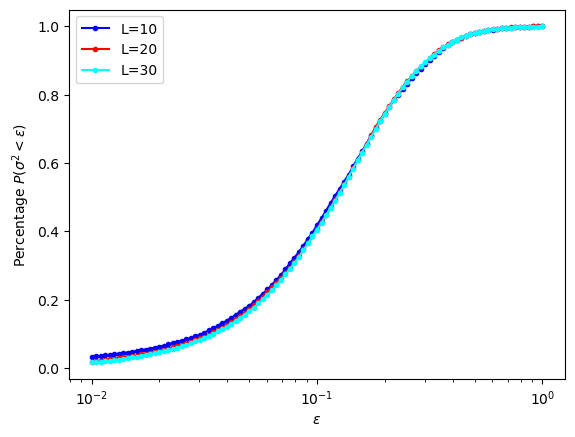

In [83]:
color_list=(x for x in ['blue','red','cyan'])

fig,ax=plt.subplots()
for L in [10,20,30]:
    # sigma=np.linspace(0,0.05,101)
    sigma=np.geomspace(1e-2,1,101)
    cdf=[(sC_traj_var_dw[0.4,L][:,1*L**2:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[0.4,L][:,L**2:2*L**2].flatten().shape[0]) for epsilon in sigma]
    ax.plot(sigma,cdf,'.-',label=f'L={L}',color=next(color_list))
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('Percentage $P(\sigma^2<\epsilon)$')
ax.legend()
ax.set_xscale('log')

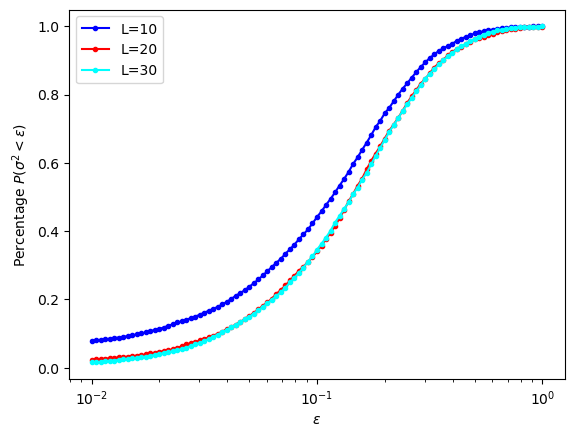

In [10]:
color_list=(x for x in ['blue','red','cyan'])

fig,ax=plt.subplots()
for L in [10,20,30]:
    # sigma=np.linspace(0,0.05,101)
    sigma=np.geomspace(1e-2,1,101)
    cdf=[(sC_traj_var_dw[0.45,L][:,1*L**2:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[0.45,L][:,L**2:2*L**2].flatten().shape[0]) for epsilon in sigma]
    ax.plot(sigma,cdf,'.-',label=f'L={L}',color=next(color_list))
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('Percentage $P(\sigma^2<\epsilon)$')
ax.legend()
ax.set_xscale('log')

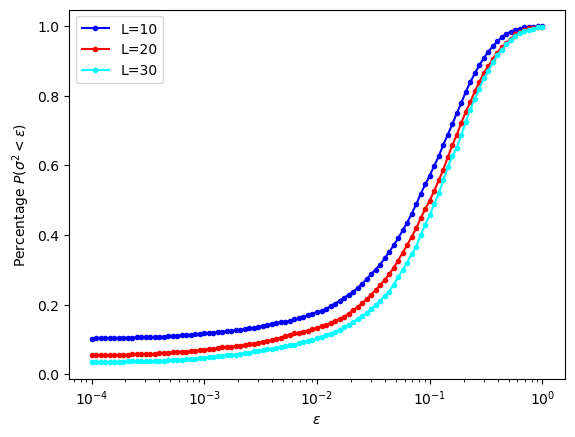

In [95]:
color_list=(x for x in ['blue','red','cyan'])

fig,ax=plt.subplots()
for L in [10,20,30]:
    sigma=np.linspace(0,0.05,101)
    sigma=np.geomspace(1e-4,1,101)
    cdf=[(sC_traj_var_dw[0.5,L][:,L**2:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[0.5,L][:,1*L**2:2*L**2].flatten().shape[0]) for epsilon in sigma]
    ax.plot(sigma,cdf,'.-',label=f'L={L}',color=next(color_list))
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('Percentage $P(\sigma^2<\epsilon)$')
ax.legend()
ax.set_xscale('log')

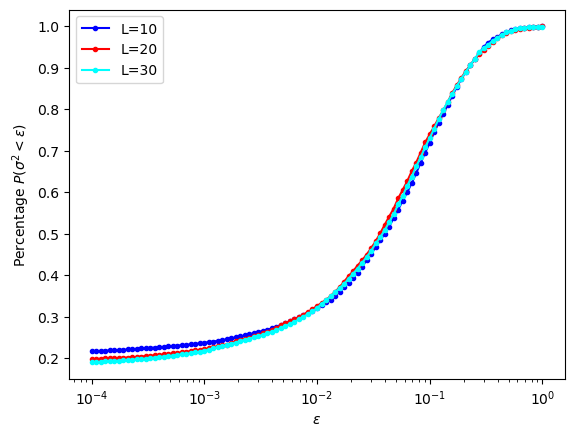

In [15]:
color_list=(x for x in ['blue','red','cyan'])

fig,ax=plt.subplots()
for L in [10,20,30]:
    # sigma=np.linspace(0,0.05,101)
    sigma=np.geomspace(1e-4,1,101)
    cdf=[(sC_traj_var_dw[0.55,L][:,L**2:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[0.55,L][:,1*L**2:2*L**2].flatten().shape[0]) for epsilon in sigma]
    ax.plot(sigma,cdf,'.-',label=f'L={L}',color=next(color_list))
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('Percentage $P(\sigma^2<\epsilon)$')
ax.legend()
ax.set_xscale('log')

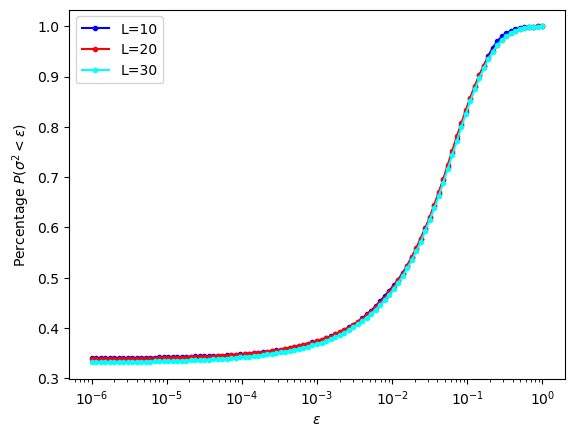

In [94]:
color_list=(x for x in ['blue','red','cyan'])

fig,ax=plt.subplots()
for L in [10,20,30]:
    # sigma=np.linspace(0,0.05,101)
    sigma=np.geomspace(1e-6,1,101)
    cdf=[(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[0.6,L][:,L**2:2*L**2].flatten().shape[0]) for epsilon in sigma]
    ax.plot(sigma,cdf,'.-',label=f'L={L}',color=next(color_list))
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('Percentage $P(\sigma^2<\epsilon)$')
ax.legend()
# ax.set_ylim(.3,0.7)
# ax.set_yscale('log')
ax.set_xscale('log')

In [15]:
len(sC_traj_var_dw[0.47,40])

0

In [17]:
[(sC_traj_var_dw[p,L][:,1*L**2:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[p,L][:,1*L**2:2*L**2].flatten().shape[0]) for p in p_ctrl_list if len(sC_traj_var_dw[p,L])>0]

[0.015803571428571427, 0.016127049180327868]

10
20
30
40


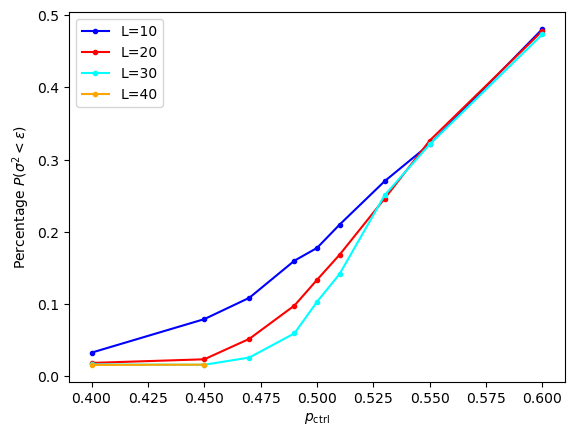

In [21]:
color_list=(x for x in ['blue','red','cyan','orange'])
epsilon = 0.01
# p_ctrl_list=[.4,.45,.5,.6]
p_ctrl_list = params_list[0][1]['p_ctrl']
# params_list[0][1]['p_ctrl']
fig,ax=plt.subplots()
for L in params_list[0][1]['L']:
    print(L)
    # cdf=[(sC_traj_var_dw[p,L][:,2*L**2-30:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[0.6,L][:,2*L**2-30:2*L**2].flatten().shape[0]) for p in p_ctrl_list]
    cdf=[(sC_traj_var_dw[p,L][:,1*L**2:2*L**2].flatten()<epsilon).sum()/(sC_traj_var_dw[p,L][:,1*L**2:2*L**2].flatten().shape[0]) for p in p_ctrl_list if len(sC_traj_var_dw[p,L])>0]
    p_ctrl_list_1=[p for p in p_ctrl_list if len(sC_traj_var_dw[p,L])>0]
    ax.plot(p_ctrl_list_1,cdf,'.-',label=f'L={L}',color=next(color_list))
ax.set_xlabel(r'$p_{\rm{ctrl}}$')
ax.set_ylabel('Percentage $P(\sigma^2<\epsilon)$')
ax.legend()

(array([19.82635082, 14.31903115,  8.26097951,  7.71024754,  2.20292787,
         1.10146393,  0.55073197,  0.        ,  0.55073197,  0.55073197]),
 array([0.00780042, 0.02595807, 0.04411573, 0.06227338, 0.08043103,
        0.09858869, 0.11674634, 0.13490399, 0.15306165, 0.1712193 ,
        0.18937695]),
 <BarContainer object of 10 artists>)

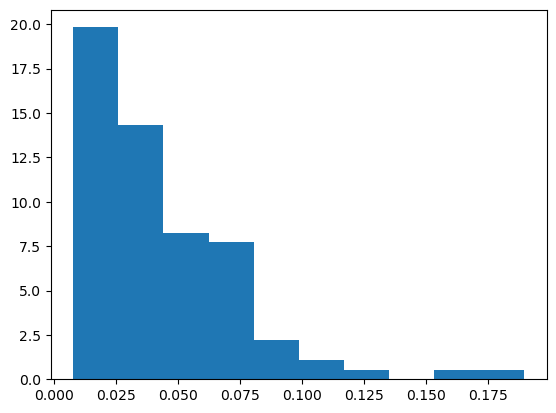

In [292]:
plt.hist(trajvar_sC[:,L**2:2*L**2].mean(axis=1),bins=10,density=True)

In [ ]:
1

: 

In [22]:
traj_var_dw_dict[(0.4,L)].shape

(1801,)

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C} ]^2 $')

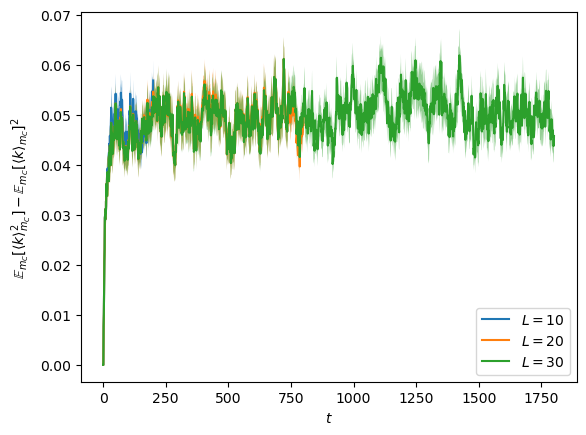

In [16]:
fig,ax=plt.subplots()
p=0.6
for L in params_list[0][1]['L']:
    x=np.arange(traj_var_dw_dict[(p,L)].shape[0])
    ax.plot(traj_var_dw_dict[(p,L)],label=rf'$L={L}$',alpha=1)
    ax.fill_between(x, traj_var_dw_dict[(p,L)]-traj_var_dw_sem_dict[(p,L)], traj_var_dw_dict[(p,L)]+traj_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C} ]^2 $')

Text(0, 0.5, '$\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C}^2 ]-\\mathbb{E}_{m_C}[ \\langle{k}\\rangle_{m_C} ]^2 $')

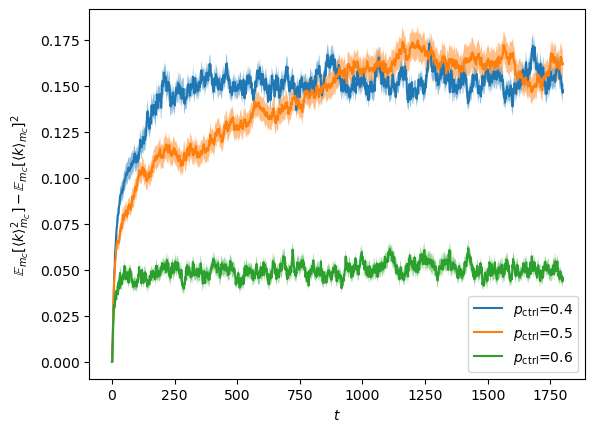

In [17]:
fig,ax=plt.subplots()
L=30
for p in params_list[0][1]['p_ctrl']:
    x=np.arange(traj_var_dw_dict[(p,L)].shape[0])
    ax.plot(traj_var_dw_dict[(p,L)],label=rf'$p_{{\rm{{ctrl}}}}$={p}',alpha=1)
    ax.fill_between(x, traj_var_dw_dict[(p,L)]-traj_var_dw_sem_dict[(p,L)], traj_var_dw_dict[(p,L)]+traj_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C}^2 ]-\mathbb{E}_{m_C}[ \langle{k}\rangle_{m_C} ]^2 $')

# circuit_var 

In [201]:
def circ_var_dw(df,L,p_ctrl,sC):
    data=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0,level='p_proj').xs(sC,level='sC')
    return np.stack(data.xs('DW1')['observations'].values).mean(axis=0)

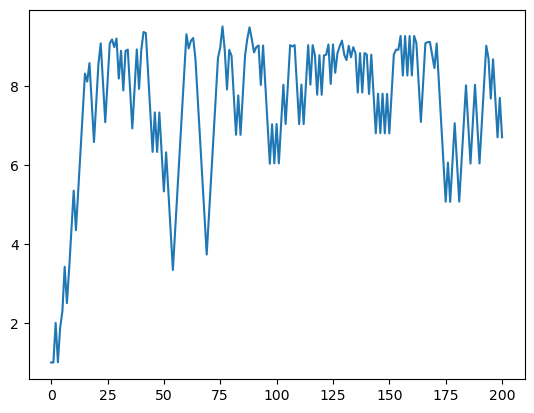

In [203]:
plt.plot(circ_var_dw(df_MPS_0_T_DW,L=10,p_ctrl=0.4,sC=0))

In [228]:
circ_var_dw_dict={}
circ_var_dw_sem_dict={}
for p in tqdm(params_list[0][1]['p_ctrl']):
    for L in params_list[0][1]['L']:
        print(p,L)
        sC_circ_var_dw=[circ_var_dw(df_MPS_0_T_DW,L=L,p_ctrl=p,sC=sC) for sC in np.arange((params_list[0][1]['sC']).shape[0])]
        sC_circ_var=np.var(sC_circ_var_dw,axis=0)
        sC_circ_var_sem=sC_circ_var*np.sqrt(2/((params_list[0][1]['sC']).shape[0]-1))
        circ_var_dw_dict[p,L],circ_var_dw_sem_dict[p,L] = sC_circ_var, sC_circ_var_sem


  0%|          | 0/3 [00:00<?, ?it/s]

0.4 10
0.4 20
0.4 30


 33%|███▎      | 1/3 [00:19<00:38, 19.25s/it]

0.5 10
0.5 20
0.5 30


 67%|██████▋   | 2/3 [00:41<00:21, 21.14s/it]

0.6 10
0.6 20
0.6 30


100%|██████████| 3/3 [01:01<00:00, 20.53s/it]


Text(0, 0.5, '$\\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ]^2 ] - \\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ] ]^2$')

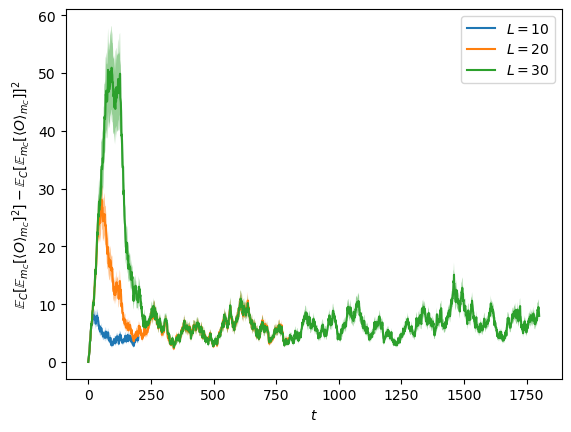

In [231]:
fig,ax=plt.subplots()
p=0.4
for L in params_list[0][1]['L']:
    x=np.arange(circ_var_dw_dict[(p,L)].shape[0])
    ax.plot(circ_var_dw_dict[(p,L)],label=rf'$L={L}$',alpha=1)
    ax.fill_between(x, circ_var_dw_dict[(p,L)]-circ_var_dw_sem_dict[(p,L)], circ_var_dw_dict[(p,L)]+circ_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ]^2 ] - \mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ] ]^2$')

Text(0, 0.5, '$\\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ]^2 ] - \\mathbb{E}_C[ \\mathbb{E}_{m_C}[ \\langle{O}\\rangle_{m_C} ] ]^2$')

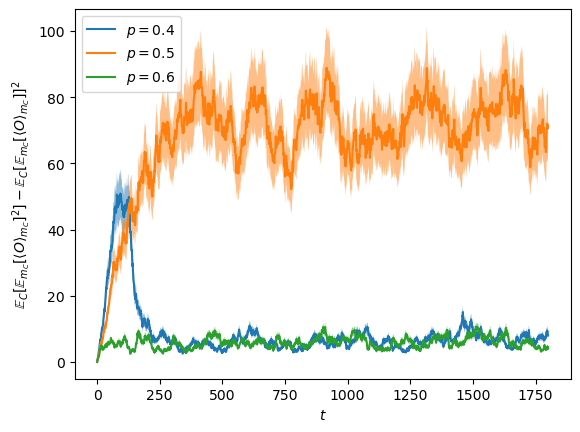

In [235]:
fig,ax=plt.subplots()
L=30
for p in params_list[0][1]['p_ctrl']:
    x=np.arange(circ_var_dw_dict[(p,L)].shape[0])
    ax.plot(circ_var_dw_dict[(p,L)],label=rf'$p={p}$',alpha=1)
    ax.fill_between(x, circ_var_dw_dict[(p,L)]-circ_var_dw_sem_dict[(p,L)], circ_var_dw_dict[(p,L)]+circ_var_dw_sem_dict[(p,L)],alpha=0.5)
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel(r'$\mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ]^2 ] - \mathbb{E}_C[ \mathbb{E}_{m_C}[ \langle{O}\rangle_{m_C} ] ]^2$')

In [10]:
zz=load_json('MPS_(0,1)_L10_pctrl0.500_pproj0.000_sC0_sm0_x01_DW_T.json')

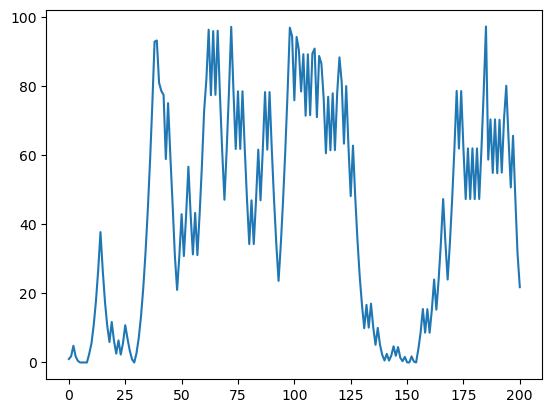

In [13]:
plt.plot(zz['DW2'])

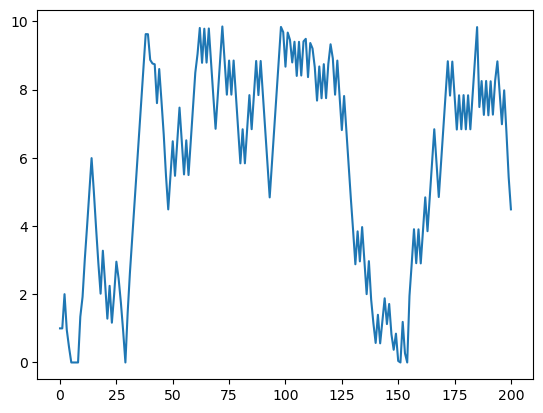

In [14]:
plt.plot(zz['DW1'])